In [196]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://datahack.analyticsvidhya.com/media/contest_cover/loanpre_banner.jpg")

# Problem Statement


### Problem


### Data

Variable :: Description 
Loan_ID :: Unique Loan ID
Gender :: Male/ Female
Married :: Applicant married (Y/N)
Dependents :: Number of dependents
Education :: Applicant Education (Graduate/ Under Graduate)
Self_Employed :: Self employed (Y/N) 
ApplicantIncome :: Applicant income 
CoapplicantIncome :: Coapplicant income
LoanAmount :: Loan amount in thousands
Loan_Amount_Term :: Term of loan in months
Credit_History :: credit history meets guidelines
Property_Area :: Urban/ Semi Urban/ Rural
Loan_Status :: Loan approved (Y/N)

In [197]:

#Roadmap: 
# What is data about, Summary of Data (EDA), Visualization,
#  Preprocessing: Missing values, Transformations, Dummy variables

# Classification  : Decision Tree, Logistic regression, Random Forest, Gradient Bosing methods, Adaboost,
#Voting classifier Method

# evalaute the model: Accuracy 

In [198]:
# Data Analysis & Viualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

#Evaluation
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.cross_validation import StratifiedKFold, cross_val_score, LeaveOneOut, train_test_split

# Building the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [199]:
load_train = pd.read_csv('train_mod.csv',index_col= 'Loan_ID')
load_test = pd.read_csv('test_mod.csv',index_col= 'Loan_ID')
#d = {'Y' : 1, 'N' : 0}
#load_train['Loan_Status'] = load_train['Loan_Status'].map(d)
#load_train.head()
#load_train.info()
#load_train.Gender.value_counts()
#load_train.isnull().sum()
#load_train.head()
load_train['Gender']=(load_train.Gender=='Female')*1
load_test['Gender']=(load_test.Gender=='Female')*1

load_train['Married']=(load_train.Married=='No')*1
load_test['Married']=(load_test.Married=='No')*1

load_train['Self_Employed']=(load_train.Self_Employed=='Yes')*1
load_test['Self_Employed']=(load_test.Self_Employed=='Yes')*1

education_map={'Graduate': 1, 'Not Graduate' : 2}
load_train['Education'] = load_train.Education.map(education_map)
load_test['Education'] = load_test.Education.map(education_map)

property_area_mapping = {'Urban': 1, 'Rural': 2, 'Semiurban': 3}
load_train['Property_Area'] = load_train.Property_Area.map(property_area_mapping)
load_test['Property_Area'] = load_test.Property_Area.map(property_area_mapping)

load_train['Property_Area']=load_train.Property_Area.fillna(1)
load_test['Property_Area']=load_test.Property_Area.fillna(1)

load_train['LoanAmount']=(load_train.LoanAmount.fillna(load_train.LoanAmount.mean()))
load_test['LoanAmount']=(load_test.LoanAmount.fillna(load_test.LoanAmount.mean()))
load_train['Loan_Amount_Term']=(load_train.Loan_Amount_Term.fillna(load_train.Loan_Amount_Term.mean()))
load_test['Loan_Amount_Term']=(load_test.Loan_Amount_Term.fillna(load_test.Loan_Amount_Term.mean()))
load_train['Credit_History']=load_train.Credit_History.fillna(1)
load_test['Credit_History']=load_test.Credit_History.fillna(1)
load_train['CoapplicantIncome'] = np.log10(load_train.CoapplicantIncome + 1)
load_test['CoapplicantIncome'] = np.log10(load_test.CoapplicantIncome + 1)
load_train['LoanAmount'] = np.log10(load_train.LoanAmount + 1)
load_test['LoanAmount'] = np.log10(load_test.LoanAmount + 1)
load_train['Loan_Amount_Term'] = np.log10(load_train.Loan_Amount_Term + 1)
load_test['Loan_Amount_Term'] = np.log10(load_test.Loan_Amount_Term + 1)

#sns.barplot(x='Gender',y='Loan_Status',data=load_train)
#load_train.describe()

In [200]:
load_train['Sum_total']=load_train['CoapplicantIncome']+load_train['ApplicantIncome']
load_train['Ratio']=load_train['LoanAmount']/load_train['Sum_total']
load_test['Sum_total']=load_test['CoapplicantIncome']+load_test['ApplicantIncome']
load_test['Ratio']=load_test['LoanAmount']/load_test['Sum_total']
load_train['EMI']=load_train['LoanAmount']/load_train['Loan_Amount_Term']
load_test['EMI']=load_test['LoanAmount']/load_test['Loan_Amount_Term']

# Modelling

In [201]:
features = load_train.columns.drop(['Dependents','Loan_Status'])
train_target = load_train.Loan_Status
load_train = load_train[features]
load_test = load_test[features]
X_train, X_test,y_train,y_test = train_test_split(load_train,train_target, test_size=0.2, random_state = 0)
X_train.shape, X_test.shape
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)
#X_test.head()
#X_test_std
#load_train.head()model = Sequential()
#model.add(Dense(8,input_shape=(13,),kernel_initializer='normal',activation='relu'))
#model.add(Dense(1,activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])          
#model.summary()
#X_train, X_val,y_train,y_val = train_test_split(load_train,train_target, test_size=0.2, random_state = 0)
#scaler = StandardScaler()
#model.fit(scaler.fit_transform(X_train.values), y_train,batch_size=16,epochs=25)

### Random forest

In [202]:
forest = RandomForestClassifier(n_estimators = 700,n_jobs=-1,criterion = 'entropy')
forest.fit(X_train,y_train)
predictions_forest = forest.predict(X_test)
#predictions_forest

In [203]:
forest = RandomForestClassifier(n_estimators = 700,n_jobs=-1,criterion = 'gini')
forest.fit(X_train,y_train)
predictions_forest = forest.predict(X_test)

### Decision Tree Classifier using Adaboost

In [204]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
ada= AdaBoostClassifier(base_estimator=tree,n_estimators=500,learning_rate=0.1,random_state= 42)


In [205]:
from sklearn.ensemble import VotingClassifier

In [206]:
eclf = VotingClassifier(estimators=[('forest',forest),('adaboost',ada)],voting='hard')

In [207]:
eclf.fit(X_train,y_train)

VotingClassifier(estimators=[('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
          ...ndom_state=None, splitter='best'),
          learning_rate=0.1, n_estimators=500, random_state=42))],
         n_jobs=1, voting='hard', weights=None)

In [208]:
y_test_pred = eclf.predict(X_test)
#y_test_pred

### Logistic regression

In [209]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l1',C=0.1)
lr.fit(X_train_std,y_train)
'Training accuracy:', lr.score(X_train_std,y_train)
'Test Accuracy:', lr.score(X_test_std,y_test)
lr.intercept_
lr.coef_[0]

array([  0.00000000e+00,  -4.82370815e-02,  -3.41730953e-02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -1.16787714e-04,   0.00000000e+00,   1.19014109e+00,
         7.79351485e-02,   0.00000000e+00,  -6.04920980e-02,
         0.00000000e+00])

In [210]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

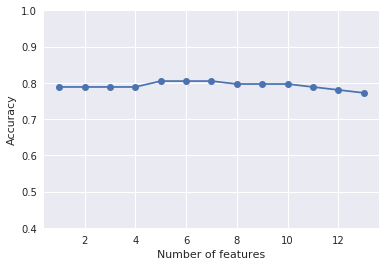

In [211]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

# selecting features
sbs = SBS(gbc, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.4, 1.0])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show();

In [212]:
k2 = list(sbs.subsets_[5])
print load_train.columns[k2]


Index([u'Gender', u'Education', u'Self_Employed', u'CoapplicantIncome',
       u'Loan_Amount_Term', u'Credit_History', u'Property_Area', u'Ratio'],
      dtype='object')


In [213]:

knn=KNeighborsClassifier()
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

('Training accuracy:', 0.81466395112016299)
('Test accuracy:', 0.80487804878048785)


In [214]:
gbc.fit(X_train_std[:, k2], y_train)
print('Training accuracy:', gbc.score(X_train_std[:, k2], y_train))
print('Test accuracy:', gbc.score(X_test_std[:, k2], y_test))

('Training accuracy:', 0.88187372708757639)
('Test accuracy:', 0.76422764227642281)


 1) Credit_History                 0.245105
 2) Ratio                          0.114926
 3) Sum_total                      0.110988
 4) EMI                            0.109378
 5) ApplicantIncome                0.107942
 6) LoanAmount                     0.105139
 7) CoapplicantIncome              0.075834
 8) Property_Area                  0.038705
 9) Loan_Amount_Term               0.027296
10) Married                        0.019831
11) Education                      0.019045
12) Self_Employed                  0.013483
13) Gender                         0.012327


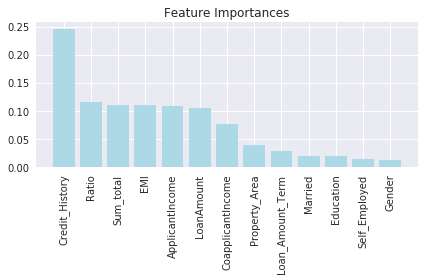

In [215]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = load_train.columns

forest = RandomForestClassifier(n_estimators=500,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [216]:
feat = ['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome']

forest = RandomForestClassifier(n_estimators=500, n_jobs=-1, criterion='entropy', min_samples_leaf=5, min_weight_fraction_leaf=.1)
forest.fit(X_train[feat], y_train)

print('Training accuracy:', forest.score(X_train[feat], y_train))
print('Test accuracy:', forest.score(X_test[feat], y_test))

('Training accuracy:', 0.8044806517311609)
('Test accuracy:', 0.82926829268292679)


In [217]:
feat = ['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome']

forest = RandomForestClassifier(n_estimators=500, n_jobs=-1, criterion='entropy', min_samples_leaf=5, min_weight_fraction_leaf=.1)
forest.fit(X_train[feat], y_train)

'Training accuracy:', forest.score(X_train[feat], y_train)


('Training accuracy:', 0.8044806517311609)

 1) Credit_History                 0.245105
 2) Ratio                          0.114926
 3) Sum_total                      0.110988
 4) EMI                            0.109378
 5) ApplicantIncome                0.107942
 6) LoanAmount                     0.105139
 7) CoapplicantIncome              0.075834
 8) Property_Area                  0.038705
 9) Loan_Amount_Term               0.027296
10) Married                        0.019831
11) Education                      0.019045
12) Self_Employed                  0.013483
13) Gender                         0.012327


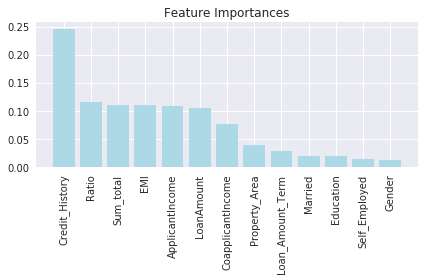

In [218]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = X_train.columns

forest = RandomForestClassifier(n_estimators=500,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [219]:

import numpy as np
from sklearn.cross_validation import StratifiedKFold
import xgboost as xgb
xgb.XGBClassifier()

kfold = StratifiedKFold(y=y_train, 
                        n_folds=10,
                        random_state=1)

y_train_bin = (y_train=='Y')*1
scores = []
for k, (train, test) in enumerate(kfold):
    xgboost_clf = xgb.XGBClassifier(learning_rate=0.008, n_estimators=500, min_child_weight=5, colsample_bytree=0.7, subsample=0.8)
    xgboost_clf.fit(X_train.values[train], y_train_bin.values[train])
    score = xgboost_clf.score(X_train.values[test], y_train_bin.values[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train_bin.values[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold: 1, Class dist.: [143 298], Acc: 0.820
Fold: 2, Class dist.: [143 298], Acc: 0.840
Fold: 3, Class dist.: [143 299], Acc: 0.816
Fold: 4, Class dist.: [143 299], Acc: 0.796
Fold: 5, Class dist.: [143 299], Acc: 0.837
Fold: 6, Class dist.: [143 299], Acc: 0.796
Fold: 7, Class dist.: [143 299], Acc: 0.694
Fold: 8, Class dist.: [143 299], Acc: 0.796
Fold: 9, Class dist.: [143 299], Acc: 0.816
Fold: 10, Class dist.: [144 299], Acc: 0.833

CV accuracy: 0.804 +/- 0.040


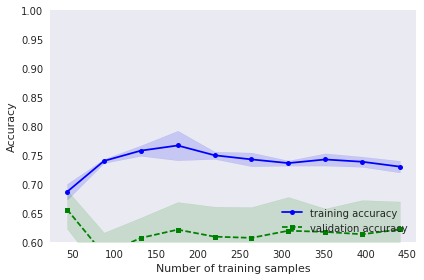

In [220]:
from sklearn.learning_curve import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=knn, 
                X=X_train, 
                y=y_train, 
                train_sizes=np.linspace(0.1, 1.0, 10), 
                cv=10,
                n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()

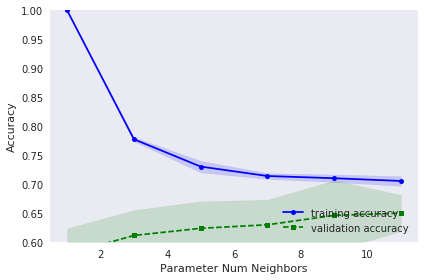

In [221]:
from sklearn.learning_curve import validation_curve

param_range = [1, 3, 5, 7, 9, 11]
train_scores, test_scores = validation_curve(
                estimator=knn, 
                X=X_train, 
                y=y_train, 
                param_name='n_neighbors', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter Num Neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.0])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

In [67]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline

pipe_rf = Pipeline([('scl', StandardScaler()),
            ('clf', RandomForestClassifier())])

param_range = [500, 700, 1000]

param_grid = [{'clf__n_estimators': param_range,
               'clf__criterion': ['gini', 'entropy']}]

gs = GridSearchCV(estimator=pipe_rf, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=1)
gs = gs.fit(X_train[['Loan_Amount_Term']], y_train)
print(gs.best_score_)
print(gs.best_params_)

0.67617107943
{'clf__criterion': 'gini', 'clf__n_estimators': 700}


In [222]:
from sklearn.metrics import confusion_matrix
gbc.fit(X_train_std, y_train)
y_pred = gbc.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print confmat

[[17 16]
 [15 75]]


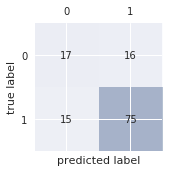

In [186]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

In [223]:
y_pred_bin = (y_pred=='Y')*1
y_test_bin = (y_test=='Y')*1
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test_bin, y_pred=y_pred_bin))
print('Recall: %.3f' % recall_score(y_true=y_test_bin, y_pred=y_pred_bin))
print('F1: %.3f' % f1_score(y_true=y_test_bin, y_pred=y_pred_bin))

Precision: 0.824
Recall: 0.833
F1: 0.829


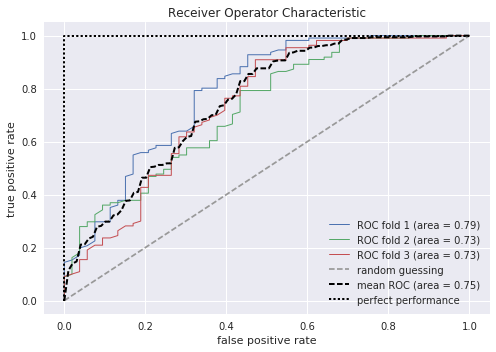

In [224]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

X_train2 = X_train.values

cv = StratifiedKFold(y_train, n_folds=3, random_state=1)

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = forest.fit(X_train2[train], 
                         y_train_bin[train]).predict_proba(X_train2[test])
    
    fpr, tpr, thresholds = roc_curve(y_train[test], 
                                     probas[:, 1], 
                                     pos_label='Y')
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label='ROC fold %d (area = %0.2f)' 
                    % (i+1, roc_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('./figures/roc.png', dpi=300)
plt.show()

In [225]:
#probs = xgboost_clf.predict_proba(X_test)
#y_pred_custom = custom_threshold(probs[:, 1], 0.40)
#error_df = X_test.copy()
#error_df['true_label'] = y_test
#error_df['predicted_label'] = y_pred_custom

#error_df['predicted_label_negative_prob'] = probs[:, 0]
#error_df['predicted_label_positive_prob'] = probs[:, 1]

In [226]:
def custom_threshold(preds, threshold=0.5):
    return ['Y' if pred > threshold else 'N' for pred in preds]

In [227]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier()
forest.fit(load_train, train_target)
predictions_forest_Extra = forest.predict(load_test)

In [228]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(load_train, train_target)
predictions_knn = knn.predict(load_test)

forest = RandomForestClassifier(n_estimators=700, n_jobs=-1, criterion='entropy')
forest.fit(load_train, train_target)
predictions_forest = forest.predict(load_test)

forest = RandomForestClassifier(n_estimators=700, n_jobs=-1, criterion='gini')
forest.fit(load_train, train_target)
predictions_forest_gini = forest.predict(load_test)



lr = LogisticRegression(C=1.)
lr.fit(load_train, train_target)
predictions_lr = lr.predict(load_test)



xgboost_clf = xgb.XGBClassifier(learning_rate=0.006, n_estimators=900, min_child_weight=5, colsample_bytree=0.7, subsample=0.8)
xgboost_clf.fit(load_train, train_target)
predictions_xgb = xgboost_clf.predict(load_test)







In [229]:
from collections import Counter
import numpy as np

def majority_voting(preds):
    """
    Given an array of predictions from various classifiers
    return single array with ensemble of predictions based on
    simple majority voting
    
    Input: list of list [[y1, y2, y3, ..], [y1, y2, y3, ...], ..] 
    Output: final prediction [y1, y2, y3, ..]
    """
    length = [len(pred) for pred in preds]
    
    if len(set(length)) != 1:
        raise ValueError('Predictions must be of the same length')
    
    pred_matrix = np.matrix(preds)
    ensemble_preds = []
    
    for i in range(len(preds[0])):
        pred_column = np.array(pred_matrix[:, i]).ravel()
        common_pred = Counter(pred_column)
        most_common = common_pred.most_common()[0][0]
        
        ensemble_preds.append(most_common)
    
    return ensemble_preds

In [230]:
ensemble_preds = majority_voting([predictions_knn, predictions_forest, predictions_forest_gini
                                  ,predictions_lr, predictions_xgb])
load_test['Loan_Status']=ensemble_preds
load_test.index.values
load_test.to_csv('Loan_Prediction_10.csv', index=False)
#create_submissions(loan_test.index.values, ensemble_preds, 'ensemble_preds_xgb_lr.csv')